In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sn        # Unused import!!!
'''one hot encoding is better than labelEncoder as assigning categories would results in errors in prediction if that feature is chosen, because higher category is considered better over the others. so in this case if google =0 and Fb =1 , then FB>Google.''';

# Load the Dataset and preprocessing

In [2]:
# load data
train = pd.read_csv(r'Dataset\Train_data.csv')
test = pd.read_csv(r'Dataset\Test_data.csv')

train.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate    class  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  anomaly  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

# Visualise the Features:
Selection  a  few  attributes  to  visually  assess  thedifferences between normal and anomalous categories.Hints:For the same attribute,you can plot the frequencies or distributions of two different categories using bar chart or histogram.

In [3]:
# Preprocess data

# Convert class to numerical categories 0,1
train['class'] = LabelEncoder().fit_transform(train['class'])
test['class']  = LabelEncoder().fit_transform(test['class'])

# Convert categorical features to numeric
#   Train
train['protocol_type'] = LabelEncoder().fit_transform( train['protocol_type'] ) 
train['service'] = LabelEncoder().fit_transform(train['service']) 
train['flag'] = LabelEncoder().fit_transform(train['flag']) 
train.head()
#   Test
test['protocol_type'] = LabelEncoder().fit_transform( test['protocol_type'] ) 
test['service'] = LabelEncoder().fit_transform(test['service'])
test['flag'] = LabelEncoder().fit_transform(test['flag'])
train.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       19     9        491          0     0   
1         0              2       41     9        146          0     0   
2         0              1       46     5          0          0     0   
3         0              1       22     9        232       8153     0   
4         0              1       22     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  class  
0                      0.00      1  
1                      0.00      1  
2                      0.00      0  
3                      0.01      1  
4                      0.00      1  

[5 rows x 42 columns]

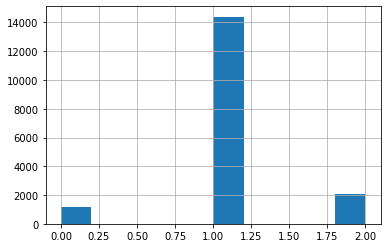

In [4]:
# Histogram visualisations
train.groupby('protocol_type').size()
train['protocol_type'].hist()

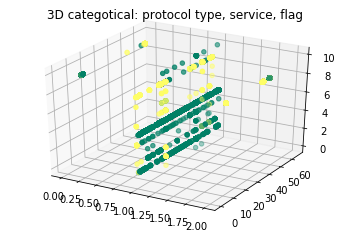

In [5]:
# TODO Visualise

#%matplotlib notebook # can run on jupyter on chrome

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
plt.title('3D categotical: protocol type, service, flag')
ax.scatter(train.protocol_type.to_numpy(), train.service.to_numpy(), train['flag'].to_numpy(), c=train['class'].to_numpy(), cmap='summer')



# Train a Machine Learning Model:

In [6]:
# DECISION TREE
# https://www.youtube.com/watch?v=PHxYNGo8NcI
# https://github.com/amine177/4nids-data-science-tools/blob/master/lab8/lab8.ipynb This looks useful but havent used yet

# select the 3 categorical features
#   Prepare train data
X_train = train[ ['protocol_type', 'service', 'flag'] ] 
y_train = train[['class']]

#   Prepare test data
X_test = test[ ['protocol_type', 'service', 'flag'] ] 
y_test = test[['class']]

[Text(144.45723214285715, 209.07692307692307, 'flag <= 5.5\ngini = 0.498\nsamples = 17634\nvalue = [8252, 9382]'),
 Text(81.30857142857143, 192.35076923076923, 'flag <= 2.5\ngini = 0.122\nsamples = 7086\nvalue = [6622, 464]'),
 Text(50.22, 175.62461538461537, 'service <= 22.5\ngini = 0.344\nsamples = 1788\nvalue = [1393, 395]'),
 Text(28.697142857142858, 158.89846153846153, 'service <= 21.5\ngini = 0.497\nsamples = 694\nvalue = [320, 374]'),
 Text(14.348571428571429, 142.1723076923077, 'service <= 0.5\ngini = 0.058\nsamples = 303\nvalue = [294, 9]'),
 Text(9.565714285714286, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(19.13142857142857, 125.44615384615385, 'service <= 1.5\ngini = 0.052\nsamples = 302\nvalue = [294, 8]'),
 Text(14.348571428571429, 108.72, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(23.914285714285715, 108.72, 'service <= 3.5\ngini = 0.046\nsamples = 299\nvalue = [292, 7]'),
 Text(14.348571428571429, 91.99384615384615, 'flag <= 1.5\ngini

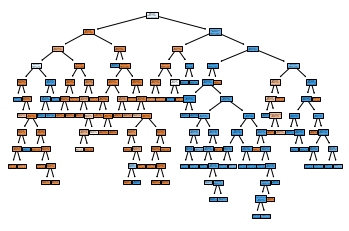

In [7]:
# Create and train model

model = tree.DecisionTreeClassifier()
tree_architecture = model.fit(X_train, y_train) # Trains model
#print(tree_architecture)
tree.plot_tree(model, feature_names=('protocol_type', 'service', 'flag'), filled=True)

# Test the Model

In [8]:

# Test model on train data
print('Score on train data: ', model.score(X_train, y_train))

# Test model on test data
print('Score on test data:  ', model.score(X_test, y_test))

Score on train data:  0.9644436883293638
Score on test data:   0.9403281291346918


[[3926  141]
 [ 310 3181]]


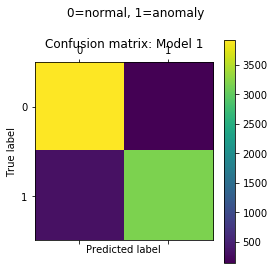

In [9]:
# Confusion Matrix
# TODO tidy up code
# TODO print confusion matrix with labels
y_pred = model.predict(X_test)

y_pred_category = ['normal' if item == 0 else 'anomaly' for item in y_pred.tolist()]

y_test_category = ['normal' if item == 0 else 'anomaly' for item in y_test['class'].values.tolist()]
# ^ doesnt even show as numeric in confusion matrix

cm = confusion_matrix(y_test_category, y_pred_category)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix: Model 1')
plt.suptitle('0=normal, 1=anomaly')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#https://stackoverflow.com/questions/43107251/is-there-a-method-like-replace-for-list-in-python
y_pred.tolist()
lol = ['normal' if item == 0 else 'anomaly' for item in y_pred] 


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


[Text(167.4, 181.2, 'flag <= 5.5\nentropy = 0.997\nsamples = 17634\nvalue = [8252, 9382]'),
 Text(83.7, 108.72, 'service <= 22.5\nentropy = 0.349\nsamples = 7086\nvalue = [6622, 464]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.712\nsamples = 2188\nvalue = [1761, 427]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.064\nsamples = 4898\nvalue = [4861, 37]'),
 Text(251.10000000000002, 108.72, 'protocol_type <= 0.5\nentropy = 0.621\nsamples = 10548\nvalue = [1630, 8918]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.606\nsamples = 1157\nvalue = [985, 172]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.361\nsamples = 9391\nvalue = [645, 8746]')]

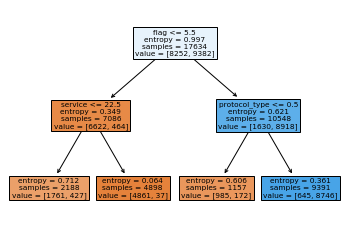

In [10]:
# Decision Tree model with different model hyperparameters / archictecture
# Criterion and depth of tree changed

model2 = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=2)
tree_architecture2 = model2.fit(X_train, y_train) # Trains model
print(tree_architecture2)
tree.plot_tree(model2, feature_names=('protocol_type', 'service', 'flag'), filled=True)

Score on train data:  0.927356243620279
Score on test data:   0.918893887271765
[[3181  310]
 [ 141 3926]]


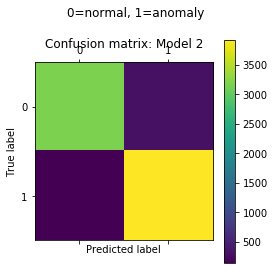

In [11]:
## Test model2
# Test model on train data
print('Score on train data: ', model2.score(X_train, y_train))

# Test model on test data
print('Score on test data:  ', model2.score(X_test, y_test))

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix: Model 2')
plt.suptitle('0=normal, 1=anomaly')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

7558


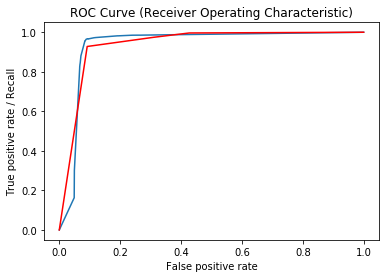

In [12]:
# ROC (Receiver Operating Characteristic)
#roc = roc_curve(y_test, )

y_pred_proba = model.predict_proba(X_test)[:,1]     # [:,1] gets first column aka probs belong to class 1
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr, tpr)

fpr2, tpr2, thresholds2 = roc_curve(y_test,  model2.predict_proba(X_test)[:,1])
plt.plot(fpr2, tpr2, c='r')

print(len(X_test))
plt.title('ROC Curve (Receiver Operating Characteristic)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate / Recall')
# Jinggin likes numbers not rates. Times by total numbrt of recorfd
plt.show() 
